<a href="https://colab.research.google.com/github/Shemjak/Polishuk_Denis_Vladyslavovich/blob/main/%D0%A1%D0%B0%D0%BC%D0%BE%D1%81%D1%82%D0%BE%D1%8F%D1%82%D0%B5%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашная работа 3. Визуальный анализ.

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.

#### Полезная литература

- [Галерея графиков Matplotlib](https://matplotlib.org/gallery/index.html)
- [Галерея графиков Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Открытый курс машинного обучения. Тема 2: Визуализация данных c Python](https://habr.com/company/ods/blog/323210/)

In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

## Визуальный анализ данных

В этом задании вам предлагается провести визуальный анализ датасета о прокатах велосипедов https://www.kaggle.com/c/bike-sharing-demand/data. Оригинальная задача предполагает построение модели предсказания количества прокатов в городе в зависимости от погоды.

Для каждого дня проката известны следующие признаки (как они были указаны в источнике данных):
- season: 1 - весна, 2 - лето, 3 - осень, 4 - зима
- yr: 0 - 2011, 1 - 2012
- mnth: от 1 до 12
- holiday: 0 - нет праздника, 1 - есть праздник
- weekday: от 0 до 6
- workingday: 0 - нерабочий день, 1 - рабочий день
- weathersit: оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман)
- temp: температура в Цельсиях
- atemp: температура по ощущениям в Цельсиях
- hum: влажность
- windspeed(mph): скорость ветра в милях в час
- windspeed(ms): скорость ветра в метрах в секунду
- cnt: количество арендованных велосипедов (это целевой признак, его мы будем предсказывать)

Загрузите с помощью pandas файл `bikes_rent.csv.gz` и выведите первые 5 строк. Ознакомьтесь с данными с помощью функций describe и info.

In [8]:
df = pd.read_csv('bikes_rent.csv')

df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          731 non-null    int64  
 1   yr              731 non-null    int64  
 2   mnth            731 non-null    int64  
 3   holiday         731 non-null    int64  
 4   weekday         731 non-null    int64  
 5   workingday      731 non-null    int64  
 6   weathersit      731 non-null    int64  
 7   temp            731 non-null    float64
 8   atemp           731 non-null    float64
 9   hum             731 non-null    float64
 10  windspeed(mph)  731 non-null    float64
 11  windspeed(ms)   731 non-null    float64
 12  cnt             731 non-null    int64  
dtypes: float64(5), int64(8)
memory usage: 74.4 KB


Давайте посмотрим на графиках, как целевой признак зависит количество прокатов (cnt) зависит от остальных признаков `df.columns[:-1]`.

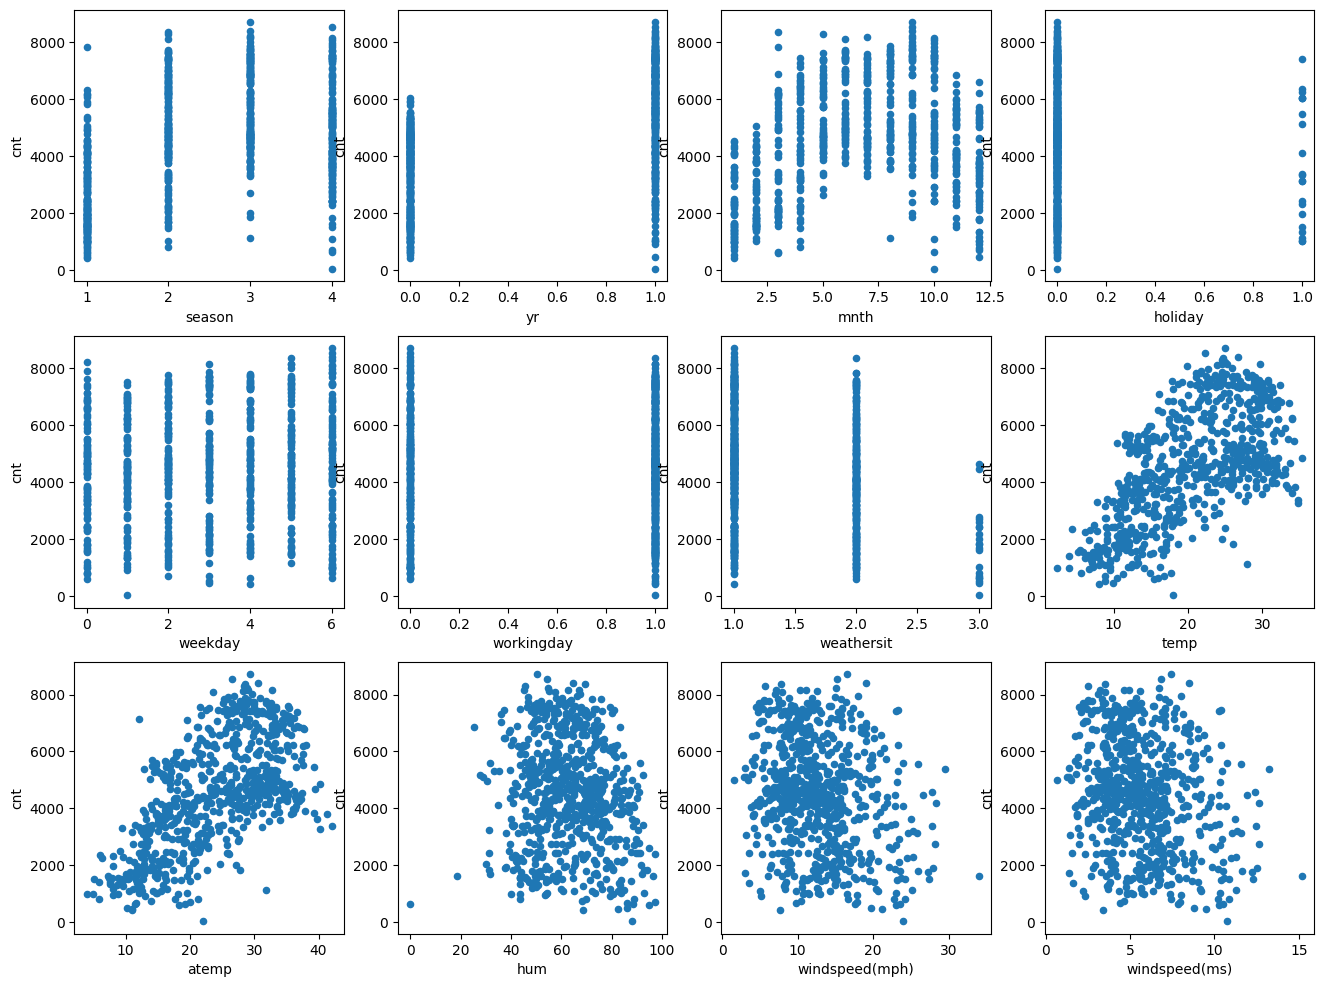

In [10]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 12))
for idx, feature in enumerate(df.columns[:-1]):
     df.plot(feature, "cnt", subplots=True, kind="scatter", ax=axes[idx // 4, idx % 4])

## 1. Ответьте на вопросы:

#### Каков характер зависимости числа прокатов от месяца?

ответ: До середины года существует прямая зависимость, после середины, обратная

#### Укажите один или два признака, от которых число прокатов скорее всего зависит линейно
_(чем больше значение, тем больше прокатов или наоборот, например)_

Можете проверить результат с помощью lnplot.

ответ: Признак от которого число прокатов зависит линейно - погода.

## 2. Корреляционная матрица

Напомним, что корреляция отражает взаимосвязь двух случайных величин. Она бывает положительная и отрицательная. Чем ближе коэффициент корреляции к нулю, тем меньше взаимосвязь. Чем больше абсолютная корреляци, тем взаимосвязь больше.

Постройте heatmap корреляционной матрицы. Матрица формируется средствами pandas, со стандартным значением параметров.

**Ответьте на вопрос**: с какими признаками количество прокатов коррелирует меньше всего (около 4 штуки). А с какими больше всего?

Ответ

<Axes: >

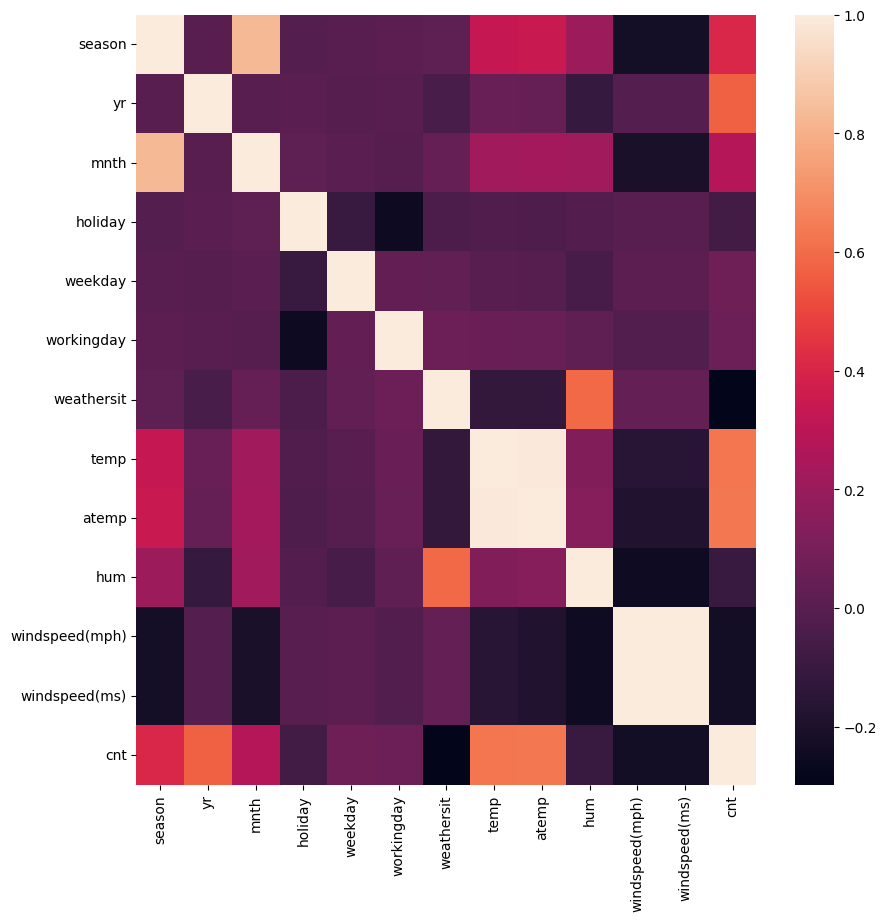

In [13]:
#Плохая корреляция с признаками: weekday,holiday,workday,hum. Хорошая корелляция с atemp
plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),)

## 3. Barpot

Постройте Bar-график суммарного количества прокатов велосипедов по месяцам за каждый год одновременно. (будет 24 столбика)

**Ответьте на вопрос:** почему в предыдущем графике была такая большая корреляция между количеством прокатов и годом?

Ответ:
Вполне вероятно, что такая большая корелляция между кол-вом прокатов и годом вызвана малым количеством данных о годах



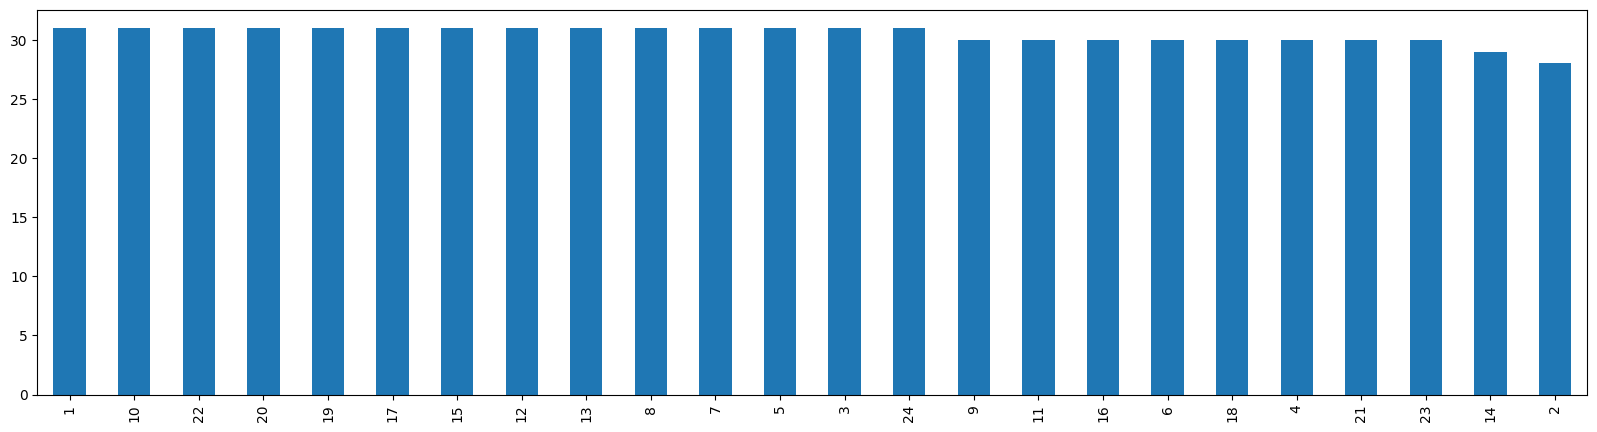

In [14]:
plt.figure(figsize = (20,5))
df.loc[df.yr == 1, 'mnth'] = df[df['yr'] == 1]['mnth'] +12
df['mnth'].value_counts().plot.bar()
df.loc[df.yr == 1, 'mnth'] = df[df['yr'] == 1]['mnth'] -12

## 4. Countplot

Постройте countplot диаграммы для признаков `weekday`, `weathersit`,

**Ответьте на вопрос:** что вы можете сказать о том, как формировался этот датасет.

**Ответьте на вопрос:** как называется распределение значений признака `weekday`?

Ответ: Вполне вероятно, что причиной создания данного датасета стала необходимость в установлении зависимости арендованных велосипедов от определённых факторов. С этой целью и были собраны представленные в датасете данные.
    
Ответ: Равномерное распределение, потому что сумма количества одного признака находится в отрезке [104;105], а сам признак принадлежит отрезку [0,6], что указывает на рациональность моего утверждения.

<Axes: xlabel='weekday', ylabel='count'>

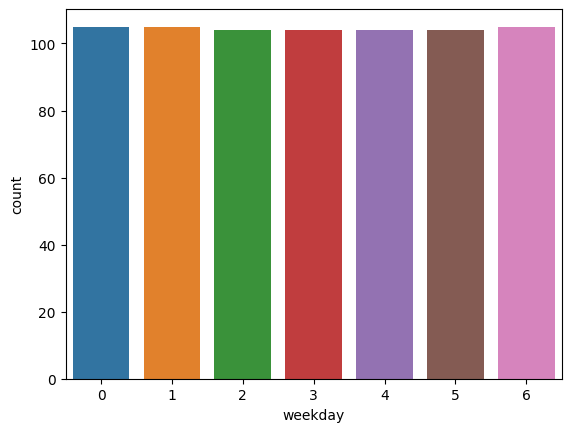

In [15]:
sns.countplot(data=df,x= 'weekday')

## 5. Распределение

Постройте распределение целевого признака.

**Ответьте на вопрос:** основываясь на графике, сколько приблизительно в среднем прокатов бывает в день?

**Ответьте на вопрос:** Как называется полученное распределение?.

Ответ: ~4500

Ответ: Нормальное распределение

<ipython-input-16-cf2ba8b14f8c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cnt'].dropna())


<Axes: xlabel='cnt', ylabel='Density'>

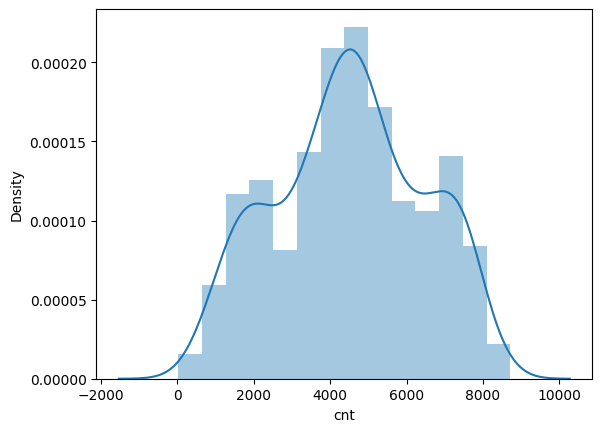

In [16]:
sns.distplot(df['cnt'].dropna())

## 6. Совместное распределение признаков

Постройте график совместного распределения признаков температура и ощущение температуры.

**Ответьте на вопрос:** вас в этом графике ничего не настораживает? Почему?

Ответ: В этом графике меня ничего не настораживает, потому что линейная зависимость температуры от ощущения температуры является вполне обоснованной как с логической точки зрения, так и фактической, учитывая, что коэффициент корелляции этих признаков показал очень высокое значение. Аномалией на этом графике является единичный случай, который говорит об ощущении температуры как 12 градусов, когда в реальности это 29 градусов. Вполне вероятно что это просто ошибка при сборе данных.

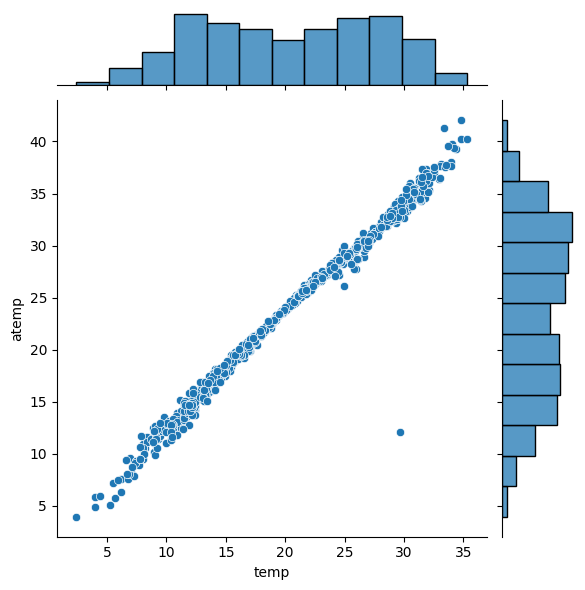

In [17]:
sns.jointplot(x='temp', y='atemp', data=df)

## 7. Ящик с усами

Нарисуйте сами для распределения количества прокатов велосипедов по месяцам в зависимости от того рабочий это день или нет.

**Ответьте на вопрос:** почему в некоторых месяцах чаще берут велосипеды в будний день, а в некоторые - в выходной.


Ответ: Трудно сделать вывод на основе данных, которые мы имеем, однако выдвину предположение, что в январе это связанно с большим количеством нерабочих дней, в июле с разгаром отдыха на природе летом в выходные, в апреле с приходом первых тёплых дней и желанием людей провести их активно в выходные.

<Axes: xlabel='mnth', ylabel='workingday'>

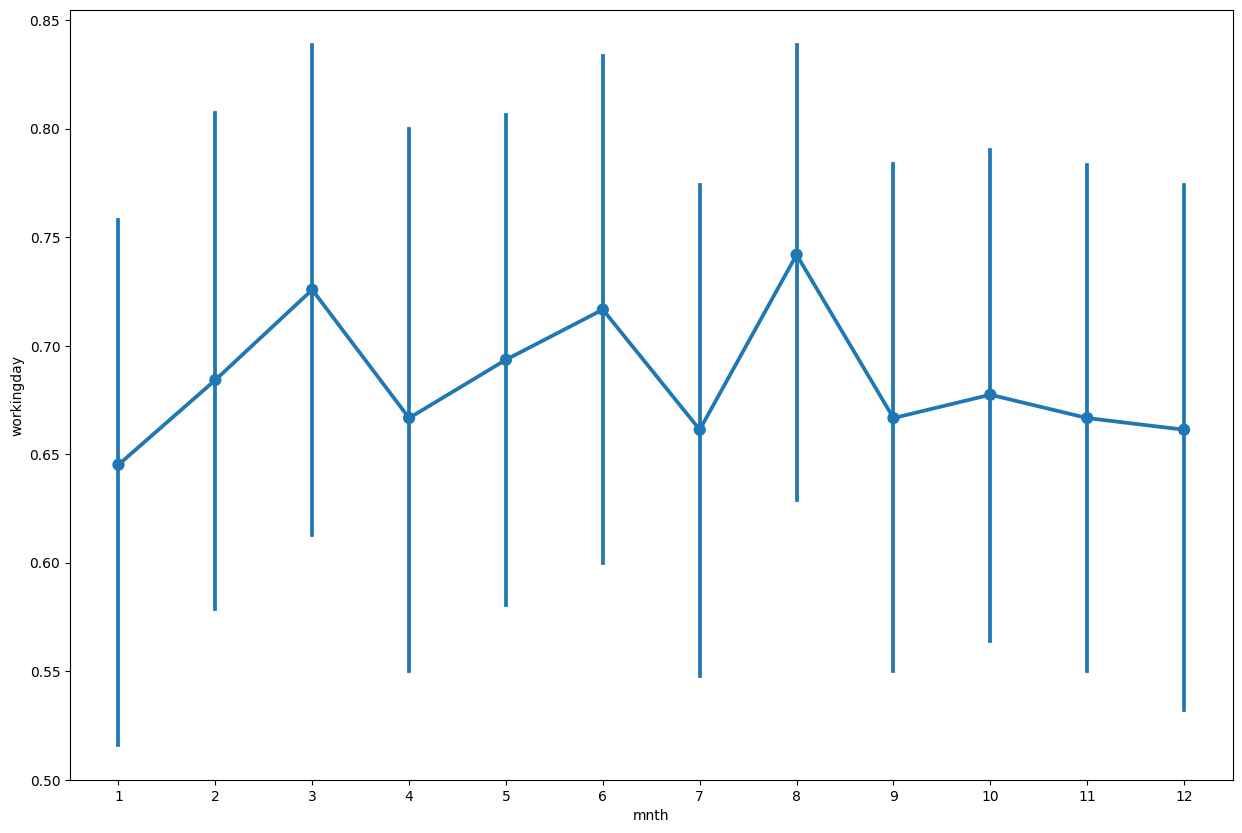

In [18]:
plt.figure(figsize=(15,10))
sns.pointplot(x='mnth', y='workingday', data=df)

## 8. Хитрый вопрос

Правда ли, что при более сильном ветре человеку ощущается, что на улице холодне, чем на самом деле? Нарисуйте график, подтверждающий или опровергающий эту гипотезу. Обоснуйте. Возможно, вам придется создать новый признак.

Рассуждение: Добавим новый признак - универсальная колонка, полученная соотношением колонки ощущаемой температуры с колонкой реальной температуры,следовательно,если ощущаемая температура меньше чем реальная,то значения универсальной колонки отрицательно, на основе этого можно легко графически отметить как много отрицательных значений. Если взять по оси горизонатльной скорость ветра,а по вертикальной значения универсальной колонки, то можно увидеть зависимость скорости ветра от ощущения температуры,как видно из графиков почти всегда(за исключением двух точек) точки лежат выше вертикальной оси,следовательно от сильного ветра людям не кажется,что на улице холоднее.

<Axes: xlabel='windspeed(ms)', ylabel='universal_colum'>

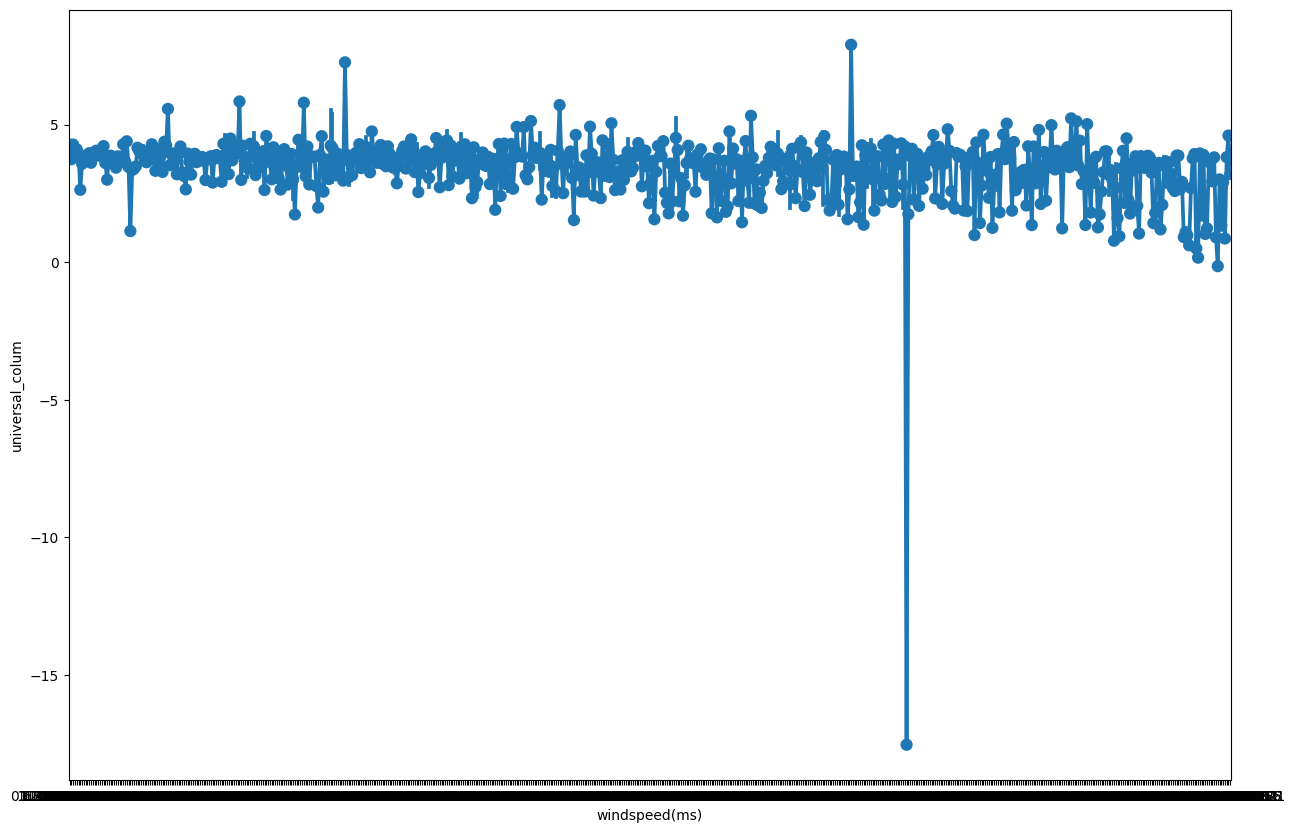

In [20]:
value = np.array(df['atemp']) - np.array(df['temp'])
se = pd.Series(value)
df['universal_colum'] = se.values
plt.figure(figsize=(15,10))
sns.pointplot(x='windspeed(ms)', y='universal_colum', data=df)